# NOAA GFS on AWS

 * [OpenData Registry](https://registry.opendata.aws/noaa-gfs-pds/)
 * [Browse datafiles](http://awsopendata.s3-website-us-west-2.amazonaws.com/noaa-gfs/#)

## GFSSource

Load and plot a forecast for a particular parameter and level. This node loads data from one S3 file given a parameter, level, base date, and forecast time.

In [1]:
from matplotlib import pyplot
from podpac.coordinates import Coordinates
from podpac.datalib.gfs import GFSSource, GFS, GFSLatest

# The data files are removed after a few weeks. Normally that won't matter
# because you would probably use GFSLatest. In order to demo GFSSource and GFS,
# let's use yesterday 12:00 as the base date.
import datetime
yesterday = datetime.datetime.now() - datetime.timedelta(1)
date = yesterday.strftime('%Y%m%d')
hour = '1200'

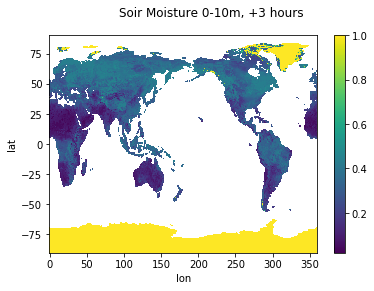

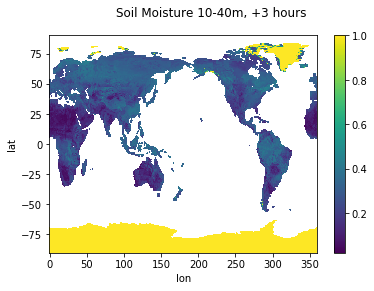

In [2]:
# SOIM forecast from 2018-12-06 12:00 for +3 hours (2018-12-06 15:00)
gfs_soim = GFSSource(parameter='SOIM', level='0-10 m DPTH', date=date, hour=hour, forecast='003')
o = gfs_soim.eval(gfs_soim.native_coordinates)
pyplot.figure(); pyplot.suptitle('Soir Moisture 0-10m, +3 hours')
o.plot()

# SOIM forecast from 2018-12-06 12:00 for +3 hours (2018-12-06 15:00)
gfs_soim = GFSSource(parameter='SOIM', level='10-40 m DPTH', date=date, hour=hour, forecast='384')
o = gfs_soim.eval(gfs_soim.native_coordinates)
pyplot.figure(); pyplot.suptitle('Soil Moisture 10-40m, +3 hours')
o.plot()

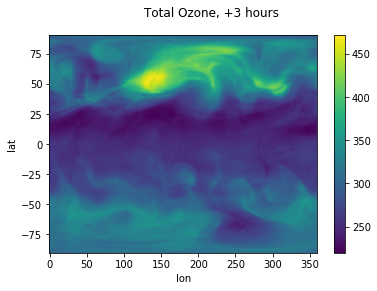

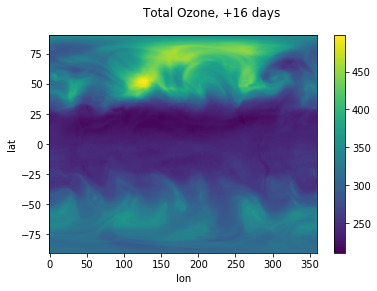

In [3]:
# TOZO forecast from 2018-12-06 12:00 for +3 hours (2018-12-22 15:00)
gfs_tozo = GFSSource(parameter='TOZO', level='0 - NONE', date=date, hour=hour, forecast='003')
o = gfs_tozo.eval(gfs_tozo.native_coordinates)
pyplot.figure(); pyplot.suptitle('Total Ozone, +3 hours')
o.plot()

# TOZO forecast from 2018-12-06 12:00 for +384 hours (2018-12-22 12:00)
gfs_tozo= GFSSource(parameter='TOZO', level='0 - NONE', date=date, hour=hour, forecast='384')
o = gfs_tozo.eval(gfs_tozo.native_coordinates)
pyplot.figure(); pyplot.suptitle('Total Ozone, +16 days')
o.plot()

## GFS

Load and plot the forecast for a particular location over time. This node aggregates the `GFSSource` forecast nodes given a parameter, level, and base date.

*Not yet complete*

In [5]:
loc = Coordinates([42, 275], dims=['lat', 'lon'])

gfs_soim = GFS(parameter='SOIM', level='0-10 m DPTH', date=date, hour=hour)
c = Coordinates([loc['lat'], loc['lon'], gfs_soim.native_coordinates['time'][:5]])
o = gfs_soim.eval(c)
print(o)
# o.plot()

<xarray.UnitsDataArray (lat: 1, lon: 1, time: 5)>
array([[[nan, nan, nan, nan, nan]]])
Coordinates:
  * lat      (lat) float64 42.0
  * lon      (lon) float64 275.0
  * time     (time) datetime64[m] 2018-12-09T15:00:00 2018-12-09T18:00:00 ...
Attributes:
    units:        None
    layer_style:  <podpac.core.style.Style object at 0x7f131f234748>


## GFSLatest

Convenience wrapper to get the most recently available `GFS` node. Just supply the parameter and level, and evaluate at any time up to 16 days from now.

*Not yet complete*

In [6]:
loc = Coordinates([42, 275], dims=['lat', 'lon'])

gfs_soim = GFSLatest(parameter='SOIM', level='0-10 m DPTH')
c = Coordinates([loc['lat'], loc['lon'], gfs_soim.native_coordinates['time'][:5]])
o = gfs_soim.eval(c)
print(o)
# o.plot()

<xarray.UnitsDataArray (lat: 1, lon: 1, time: 5)>
array([[[nan, nan, nan, nan, nan]]])
Coordinates:
  * lat      (lat) float64 42.0
  * lon      (lon) float64 275.0
  * time     (time) datetime64[m] 2018-12-10T15:00:00 2018-12-10T18:00:00 ...
Attributes:
    units:        None
    layer_style:  <podpac.core.style.Style object at 0x7f131e781dd8>
